In [25]:
import pandas as pd
import numpy as np
import matplotlib as plt
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')

In [4]:
raw_data = pd.read_csv("../../Data/GRUPO DRAGON 2018/ech1 18092018/ech1 18092018.txt", encoding = "utf8")

In [5]:
raw_data.head()

,SDR 7.8.18
0,-----Logger Information-----
1,Model #\t4280
2,Serial #\t09279
3,Hardware Rev.\t023-022-000
4,-----Site Information-----


In [6]:
# "Sensor History\n", "Data\n" son las lineas fundamentales

In [7]:
type(raw_data)

pandas.core.frame.DataFrame

In [8]:
raw_data.columns

Index(['SDR\t7.8.18'], dtype='object')

In [9]:
len(raw_data['SDR\t7.8.18'])

50612

In [11]:
type(raw_data['SDR\t7.8.18'])

pandas.core.series.Series

In [12]:
raw_data[raw_data['SDR\t7.8.18'].str.contains('Date & Time Stamp')]

columns_names = raw_data[raw_data['SDR\t7.8.18'].str.contains('Date & Time Stamp')]['SDR\t7.8.18'].str.split('\t')
columns_names = columns_names[150]

In [13]:
raw_data_splitted = raw_data['SDR\t7.8.18'].str.split('\t', expand = True)

In [14]:
raw_data_new = pd.DataFrame(raw_data_splitted[raw_data_splitted[raw_data_splitted[0].str.contains('Date & Time Stamp')].index[0] +1:])
raw_data_new.columns = columns_names
raw_data_new.reset_index(drop=True, inplace=True)
raw_data_new['Date & Time Stamp'] = pd.to_datetime(raw_data_new['Date & Time Stamp'])
raw_data_new.set_index('Date & Time Stamp', inplace=True)

In [15]:
raw_data_new.tail()

,CH1Avg,CH1SD,CH1Max,CH1Min,CH2Avg,CH2SD,CH2Max,CH2Min,CH3Avg,CH3SD,...,CH13Max,CH13Min,CH14Avg,CH14SD,CH14Max,CH14Min,CH15Avg,CH15SD,CH15Max,CH15Min
Date & Time Stamp,,,,,,,,,,,,,,,,,,,,,
2018-09-18 11:20:00,3.6,0.9,5.7,1.1,3.6,1,6.1,1.1,3.4,0.8,...,6.7,1.8,3.8,1,6.3,1,0.4,0,0.4,0.4
2018-09-18 11:30:00,3.9,0.7,6.5,2.3,3.8,0.7,6.1,2.3,3.9,0.8,...,7.1,2.5,4.3,0.8,6.7,2.9,0.4,0,0.4,0.4
2018-09-18 11:40:00,3.9,0.9,6.9,1.9,3.8,1,5.7,1.5,3.9,0.9,...,7.5,2.2,4.2,0.9,6.7,2.1,0.4,0,0.4,0.4
2018-09-18 11:50:00,3.9,0.6,5.7,2.3,3.9,0.6,5.7,2.3,3.9,0.7,...,6,2.5,4.1,0.7,6,2.5,0.4,0,0.4,0.4
2066-01-01 03:00:00,1.7,0.7,4.2,0.4,1.6,0.9,4.2,0.4,1.9,0.7,...,3.7,0.6,1.8,0.6,3.3,0.6,0.4,0,0.4,0.4


In [16]:
raw_data_new = raw_data_new[:-1]

In [17]:
raw_data_new.tail()

,CH1Avg,CH1SD,CH1Max,CH1Min,CH2Avg,CH2SD,CH2Max,CH2Min,CH3Avg,CH3SD,...,CH13Max,CH13Min,CH14Avg,CH14SD,CH14Max,CH14Min,CH15Avg,CH15SD,CH15Max,CH15Min
Date & Time Stamp,,,,,,,,,,,,,,,,,,,,,
2018-09-18 11:10:00,3.7,0.8,6.5,1.9,3.6,0.9,6.5,1.1,3.7,0.8,...,6.4,1.8,4,0.9,7.1,2.1,0.4,0,0.4,0.4
2018-09-18 11:20:00,3.6,0.9,5.7,1.1,3.6,1,6.1,1.1,3.4,0.8,...,6.7,1.8,3.8,1,6.3,1,0.4,0,0.4,0.4
2018-09-18 11:30:00,3.9,0.7,6.5,2.3,3.8,0.7,6.1,2.3,3.9,0.8,...,7.1,2.5,4.3,0.8,6.7,2.9,0.4,0,0.4,0.4
2018-09-18 11:40:00,3.9,0.9,6.9,1.9,3.8,1,5.7,1.5,3.9,0.9,...,7.5,2.2,4.2,0.9,6.7,2.1,0.4,0,0.4,0.4
2018-09-18 11:50:00,3.9,0.6,5.7,2.3,3.9,0.6,5.7,2.3,3.9,0.7,...,6,2.5,4.1,0.7,6,2.5,0.4,0,0.4,0.4


In [18]:
plotting_avg = raw_data_new.filter(regex='Avg|Date')

In [19]:
for cols in plotting_avg.loc[:, plotting_avg.columns != 'Date & Time Stamp']:
    plotting_avg.loc[:, cols] = pd.to_numeric(plotting_avg.loc[:, cols], errors='coerce')

plotting_avg.dtypes

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


CH1Avg     float64
CH2Avg     float64
CH3Avg     float64
CH4Avg     float64
CH5Avg     float64
CH6Avg     float64
CH7Avg       int64
CH8Avg       int64
CH9Avg     float64
CH10Avg    float64
CH11Avg    float64
CH12Avg    float64
CH13Avg    float64
CH14Avg    float64
CH15Avg    float64
dtype: object

In [20]:
plotting_avg.isna().all()

CH1Avg     False
CH2Avg     False
CH3Avg     False
CH4Avg     False
CH5Avg      True
CH6Avg      True
CH7Avg     False
CH8Avg     False
CH9Avg     False
CH10Avg    False
CH11Avg     True
CH12Avg    False
CH13Avg    False
CH14Avg    False
CH15Avg    False
dtype: bool

In [23]:
plotting_avg.drop(labels=['CH5Avg', 'CH6Avg', 'CH11Avg'], inplace=True, axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


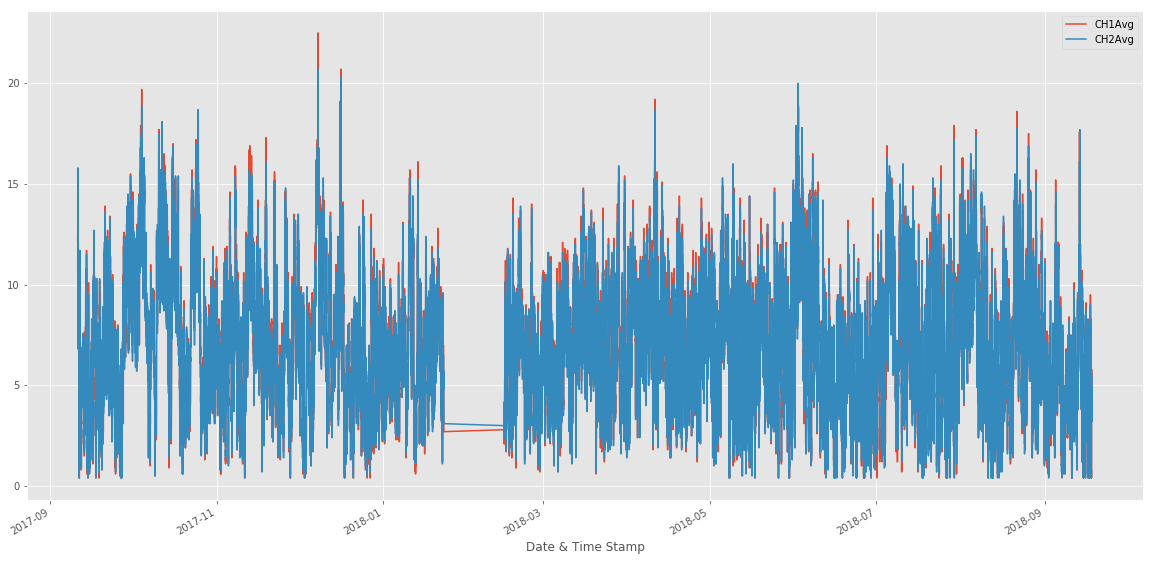

In [32]:
plotting_avg.iloc[:, [0,1]].plot()

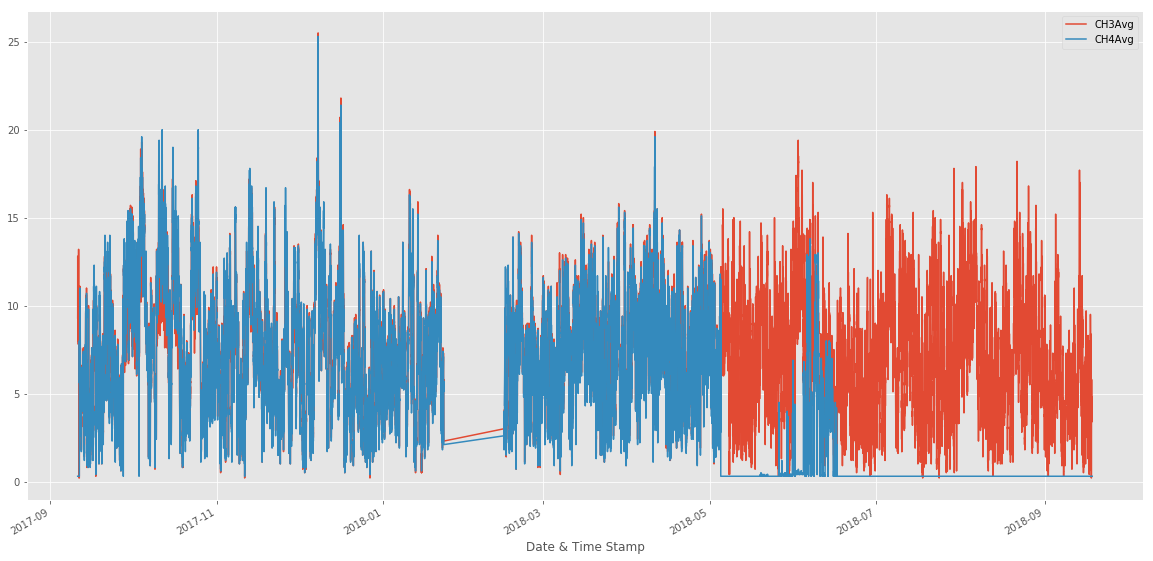

In [33]:
plotting_avg.iloc[:, [2,3]].plot()

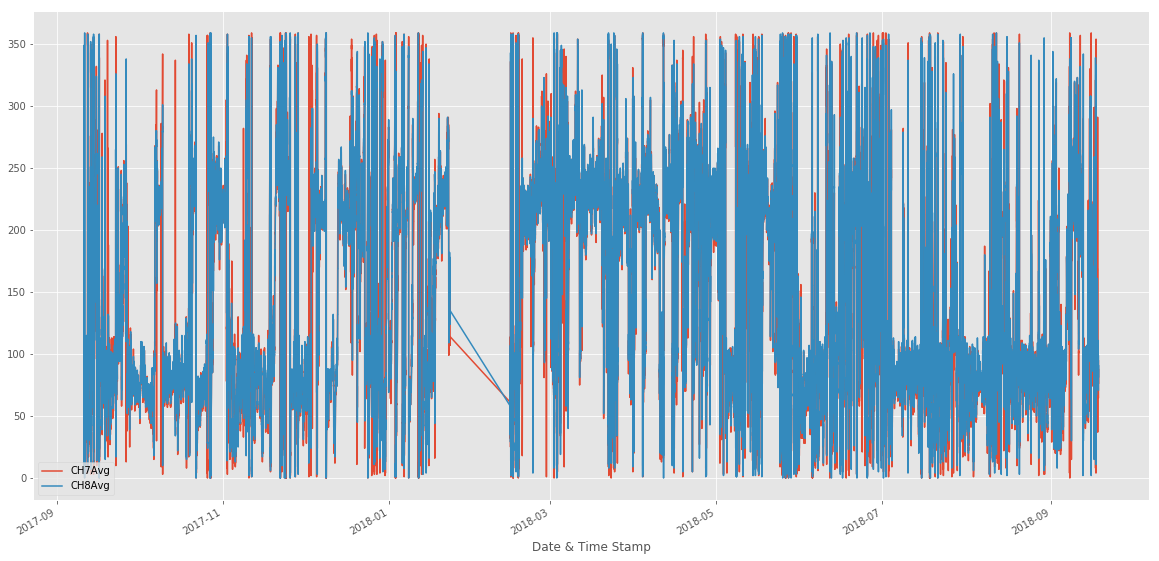

In [34]:
plotting_avg.iloc[:, [4,5]].plot()

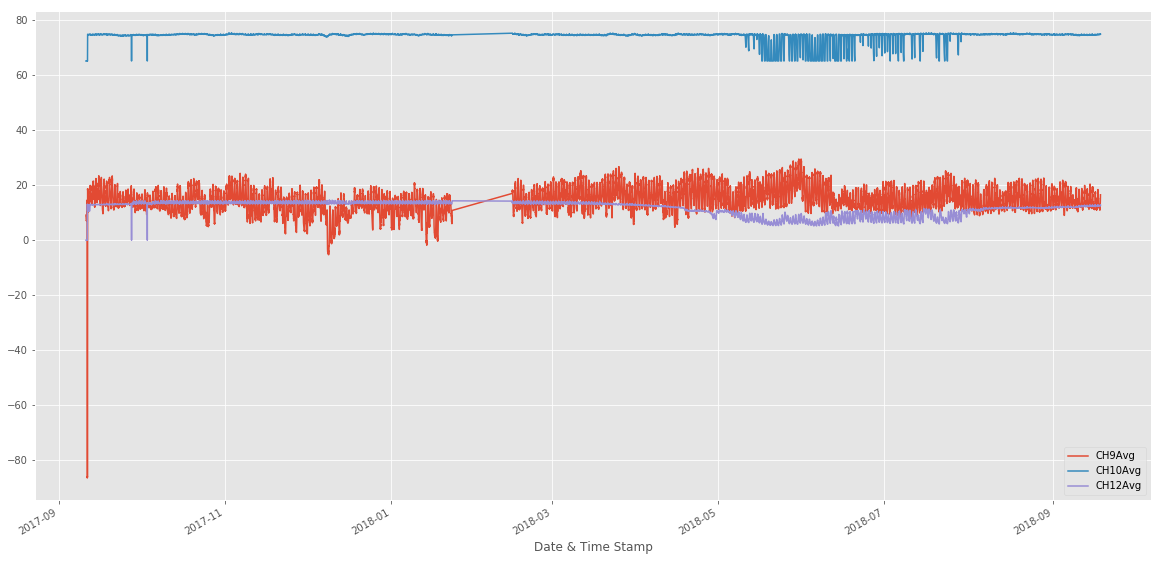

In [41]:
plotting_avg.iloc[:, [6,7,8]].plot()

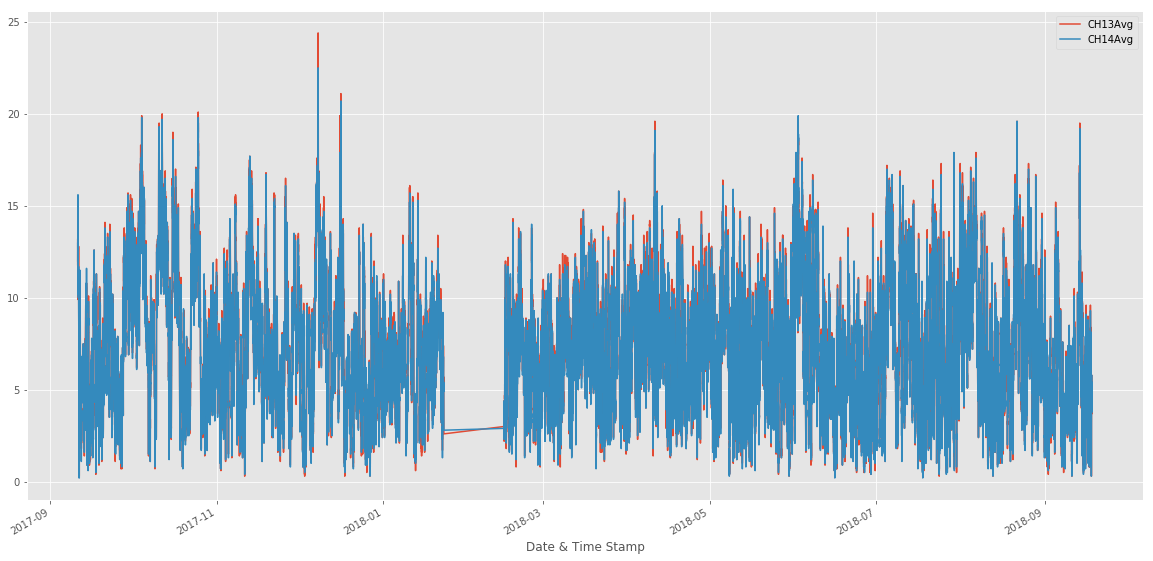

In [40]:
plotting_avg.iloc[:, [9,10]].plot()

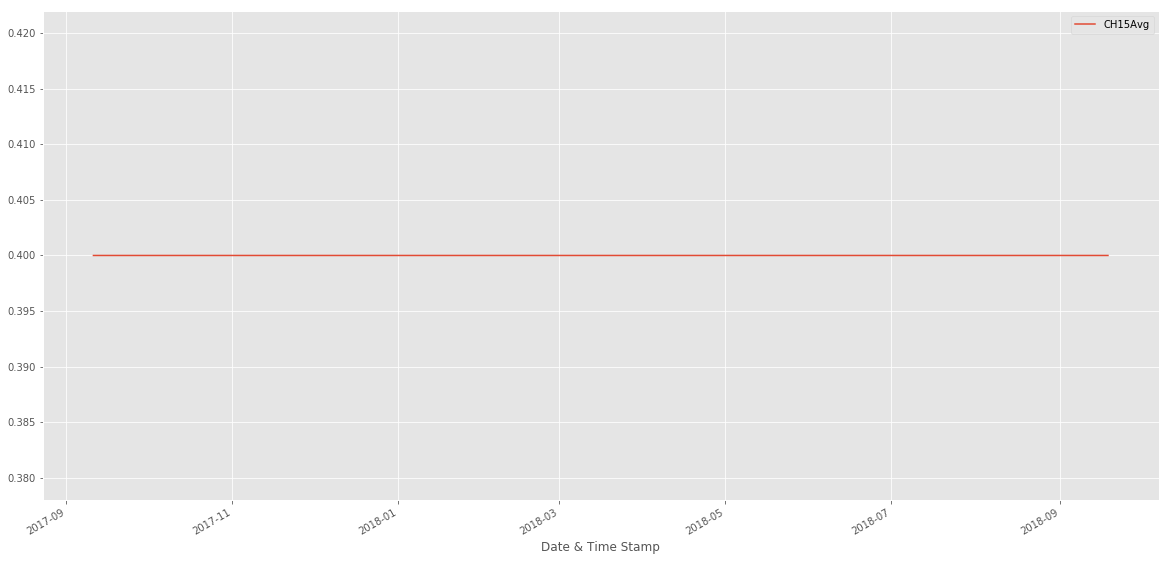

In [42]:
plotting_avg.iloc[:, [11]].plot()

In [28]:
plotting_avg.isna().all()

CH1Avg     False
CH2Avg     False
CH3Avg     False
CH4Avg     False
CH7Avg     False
CH8Avg     False
CH9Avg     False
CH10Avg    False
CH12Avg    False
CH13Avg    False
CH14Avg    False
CH15Avg    False
dtype: bool